# Pure Shear, neutrally buoyant, non-gyrotactic

# *Deterministic*

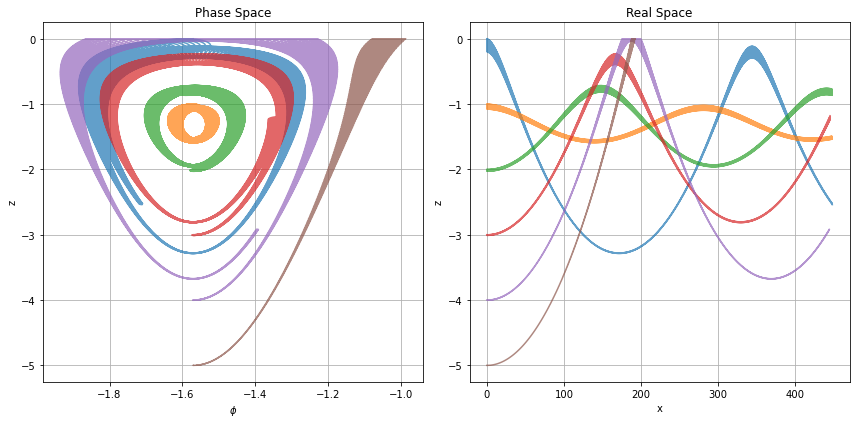

In [13]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_deterministic.png', dpi=300)
plt.show()


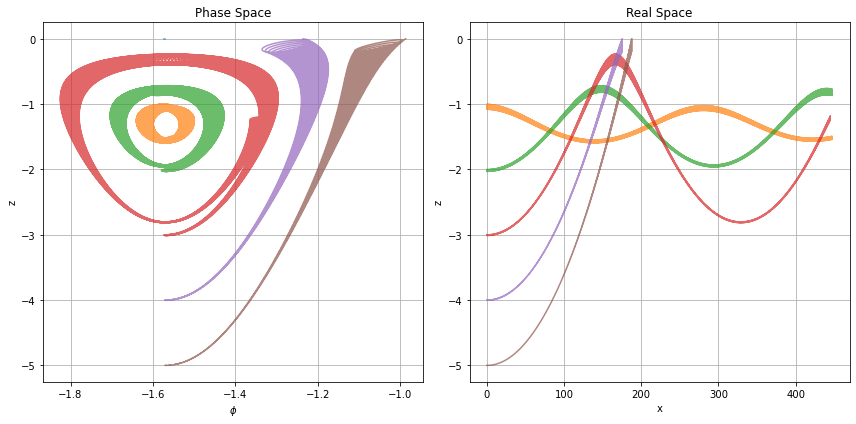

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETRI MODELLO ---
sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  


# --- INTEGRAZIONE CON STOP Z>0 ---
def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)

    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i])
                             - 0.5 * 1/psi * np.sin(phi[i])
                             + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i])
                         + v0*np.sin(phi[i])
                         + sigma *(beta + z[i]))*dt
        
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i])
                         + v0*np.cos(phi[i]) - vg)*dt
        
        # --- STOP INTEGRAZIONE ---
        if z[i+1] > 0:
            last = i + 2   # include indice i+1
            return x[:last], z[:last], phi[:last]
        
    # Se non è mai uscito
    return x, z, phi



# --- SIMULAZIONE MULTIPLE TRAIETTORIE ---
paths = []  # lista dinamica

for i in range(num_paths):
    phi0 = -0.5 * np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append({"x": x, "z": z, "phi": phi})



# --- PLOTTAGGI ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# Phase space
for p in paths:
    phip = np.mod(p["phi"], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, p["z"], alpha=0.7)

ax1.set_xlabel('$\\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

# Real space
for p in paths:
    ax2.plot(p["x"], p["z"], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout()
plt.show()


# *Stochastic*

### $D_t = 0$, $D_r$ increasing 

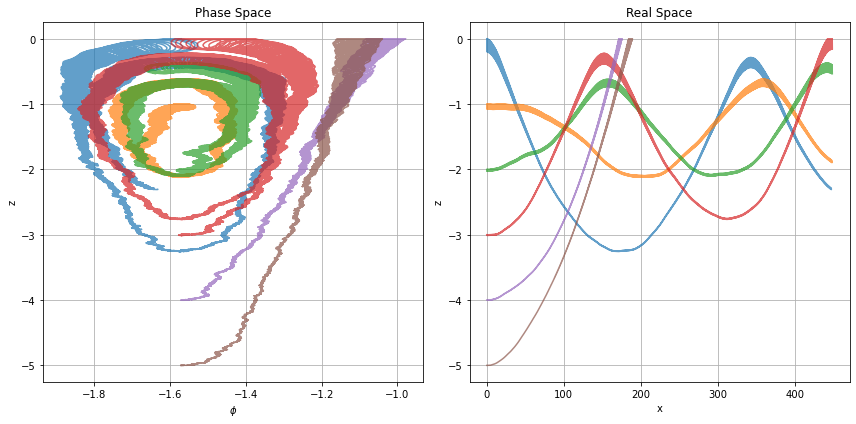

In [27]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.000001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


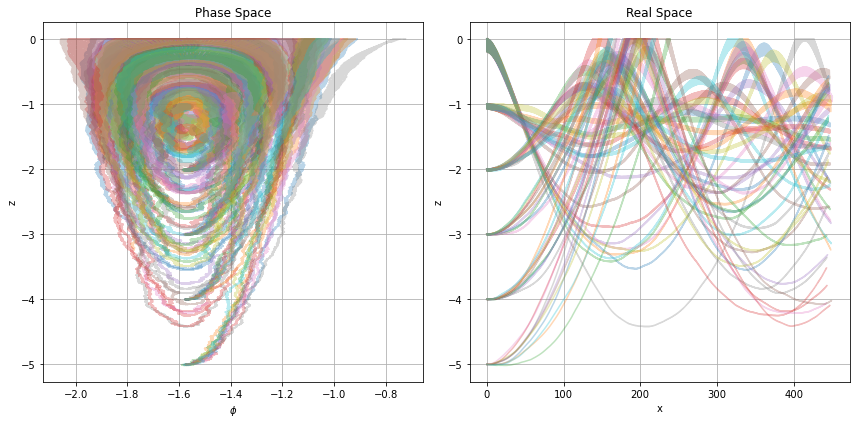

In [8]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.000001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  
realizations = 10

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i])
                             - 0.5 * 1/psi * np.sin(phi[i]) 
                             + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt \
                             + np.sqrt(2*D_r*dt)*np.random.randn()
        
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) 
                         + v0*np.sin(phi[i]) 
                         + sigma *(beta + z[i]))*dt \
                         + np.sqrt(2*D_t*dt)*np.random.randn()
        
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) 
                         + v0*np.cos(phi[i]) - vg)*dt \
                         + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi


paths = np.zeros((num_paths, realizations, 3, len(t)))

for i in range(num_paths):
    for r in range(realizations):
        phi0 = -0.5*np.pi
        x, z, phi = integrate(0, -i, phi0, v0, t)
        paths[i, r, 0, :] = x
        paths[i, r, 1, :] = z
        paths[i, r, 2, :] = phi


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

colors = plt.cm.tab10(np.linspace(0, 1, num_paths))

for i in range(num_paths):
    for r in range(realizations):
        path = paths[i, r]
        mask = path[1, :] <= 0
        phip = np.mod(path[2, mask], 2*np.pi)
        phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
        ax1.plot(phipp, path[1, mask], alpha=0.3)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for i in range(num_paths):
    c = colors[i]
    for r in range(realizations):
        path = paths[i, r]
        mask = path[1, :] <= 0
        ax2.plot(path[0, mask], path[1, mask], alpha=0.3)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout()
plt.show()

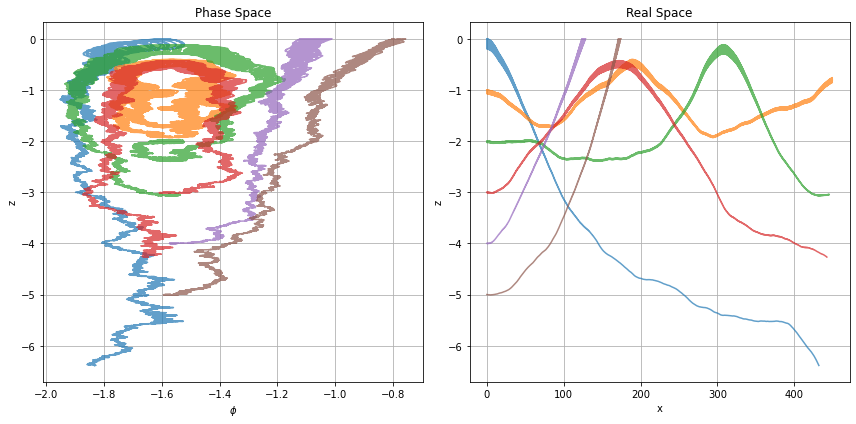

In [28]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_stochastic_2.png', dpi=300)
plt.show()


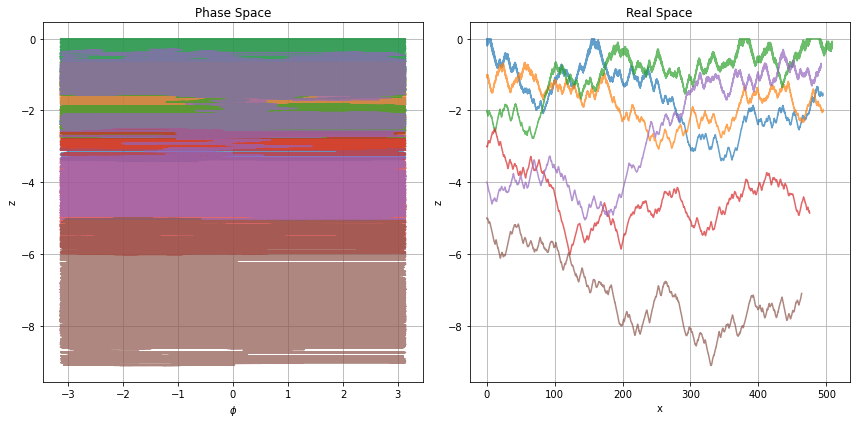

In [29]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.08

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_stochastic_3.png', dpi=300)
plt.show()


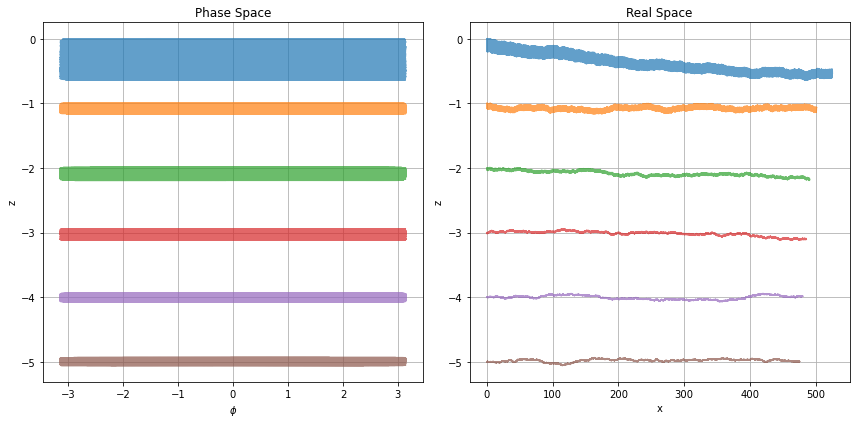

In [30]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 100

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_stochastic_4.png', dpi=300)
plt.show()


## !!! All good, we can understand the behaviour of the swimmers with increasing rotational diffusion coefficient BUT lines in the deterministic case should close around the neutral equilibrium point.

## Same things but with smaller dt and longer execution time to get more precision

C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\3420680075.py:29: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\3420680075.py:30: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\3420680075.py:31: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\3420680075.py:29: RuntimeWarning: invalid value encountered in double_scalars
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\

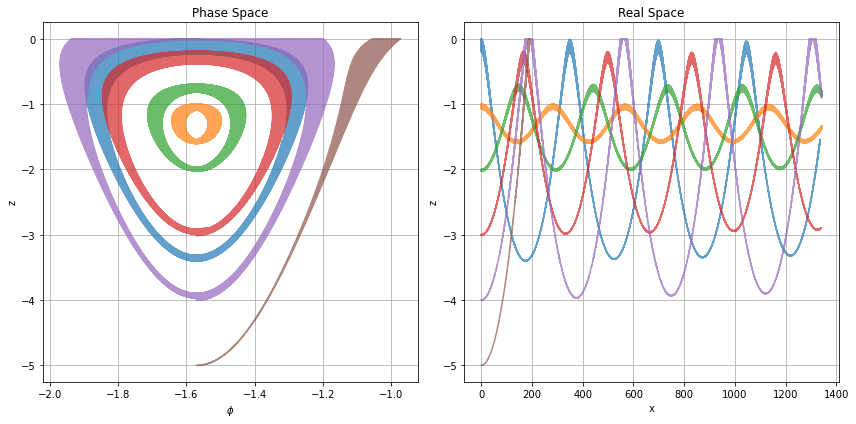

In [67]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 15000
dt = 0.005
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('long_MS_deterministic.png', dpi=300)
plt.show()


C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2233130337.py:34: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2233130337.py:35: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2233130337.py:36: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2233130337.py:34: RuntimeWarning: invalid value encountered in double_scalars
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[

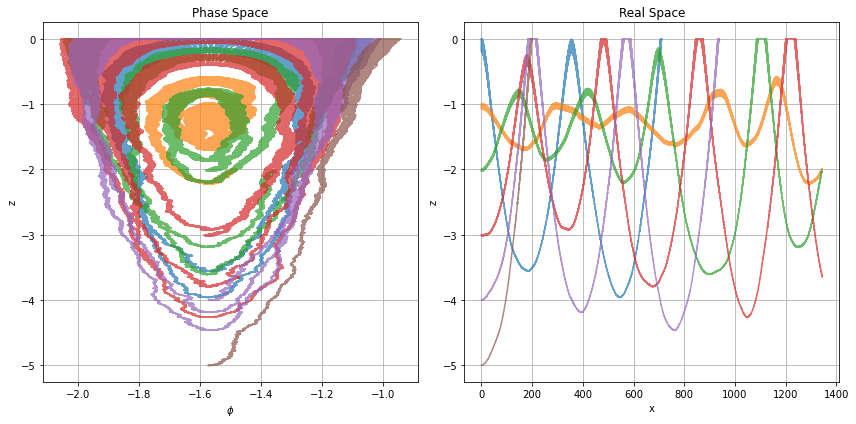

In [68]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.000001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 15000
dt = 0.005
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('long_MS_stochastic_1.png', dpi=300)
plt.show()


C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\949872757.py:34: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\949872757.py:35: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\949872757.py:36: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\949872757.py:34: RuntimeWarning: invalid value encountered in cos
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/p

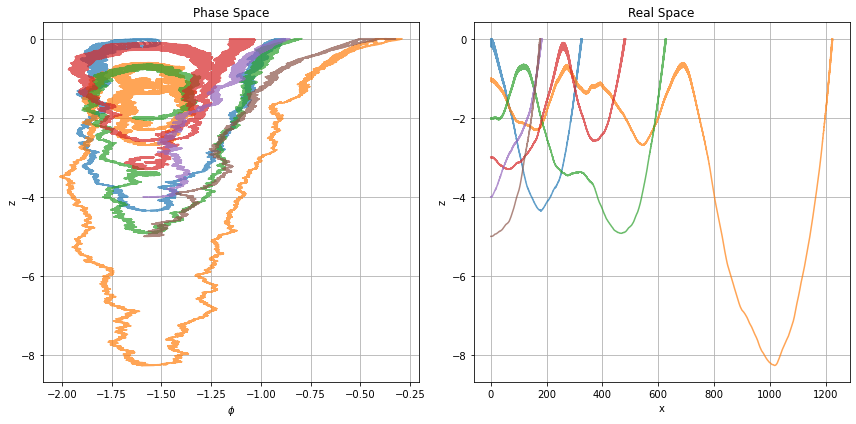

In [69]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 15000
dt = 0.005
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('long_MS_stochastic_2.png', dpi=300)
plt.show()


C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2726946866.py:34: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2726946866.py:35: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2726946866.py:36: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
C:\Users\pietr\AppData\Local\Temp\ipykernel_21080\2726946866.py:34: RuntimeWarning: invalid value encountered in double_scalars
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[

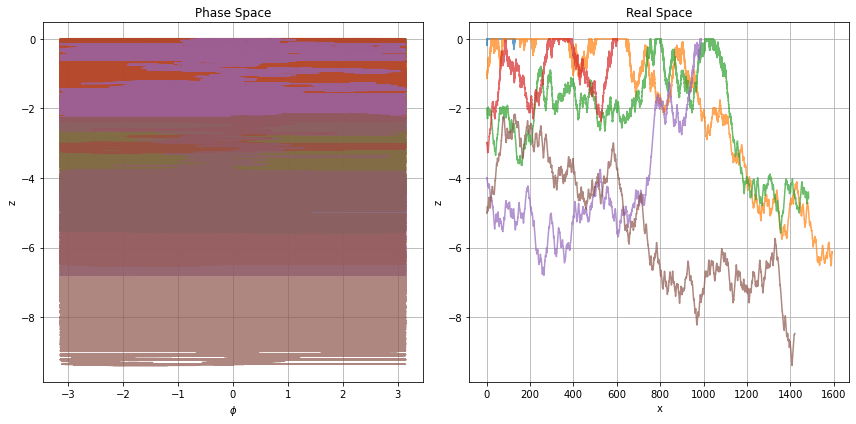

In [70]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 0.08

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 15000
dt = 0.005
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('long_MS_stochastic_3.png', dpi=300)
plt.show()


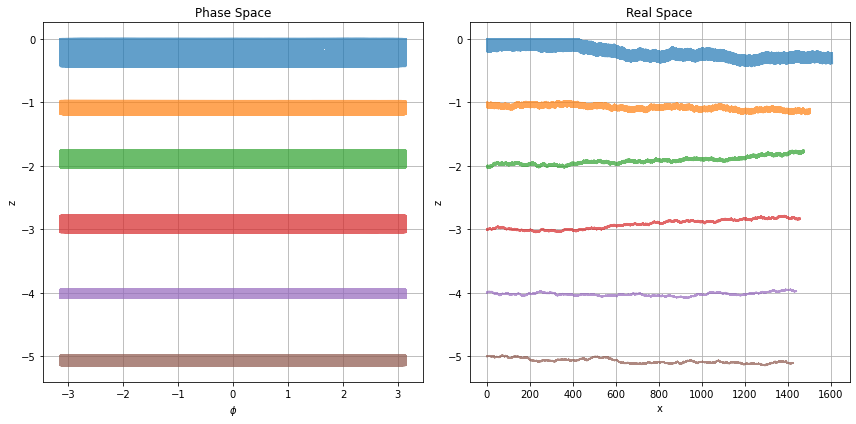

In [71]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00000
D_r = 100

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 15000
dt = 0.005
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('long_MS_stochastic_4.png', dpi=300)
plt.show()


### Deterministic case is still not perfect DONC:

### EVEN SMALLER dt AND LONGER TIME

C:\Users\pietr\AppData\Local\Temp\ipykernel_39208\3006796337.py:29: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_39208\3006796337.py:30: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_39208\3006796337.py:31: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_39208\3006796337.py:29: RuntimeWarning: invalid value encountered in double_scalars
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\

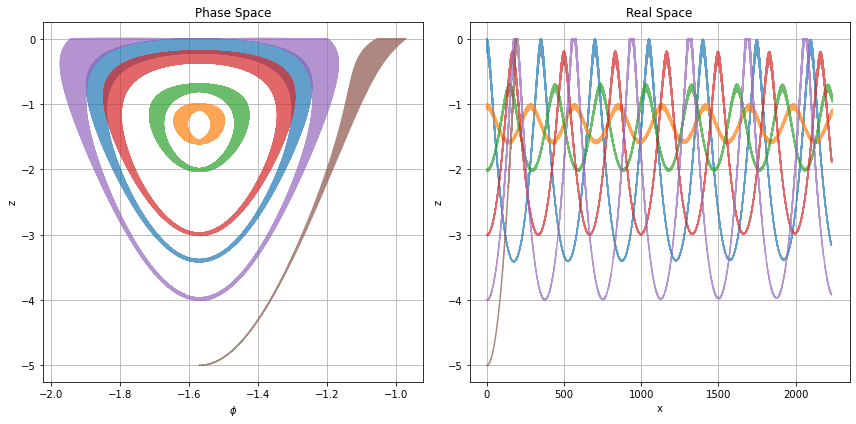

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 25000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('longer_MS_deterministic.png', dpi=300)
plt.show()


C:\Users\pietr\AppData\Local\Temp\ipykernel_42796\1408213232.py:29: RuntimeWarning: overflow encountered in exp
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_42796\1408213232.py:30: RuntimeWarning: overflow encountered in exp
  x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_42796\1408213232.py:31: RuntimeWarning: overflow encountered in exp
  z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
C:\Users\pietr\AppData\Local\Temp\ipykernel_42796\1408213232.py:29: RuntimeWarning: invalid value encountered in double_scalars
  phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
C:\Users\pietr\AppData\Local\Temp\

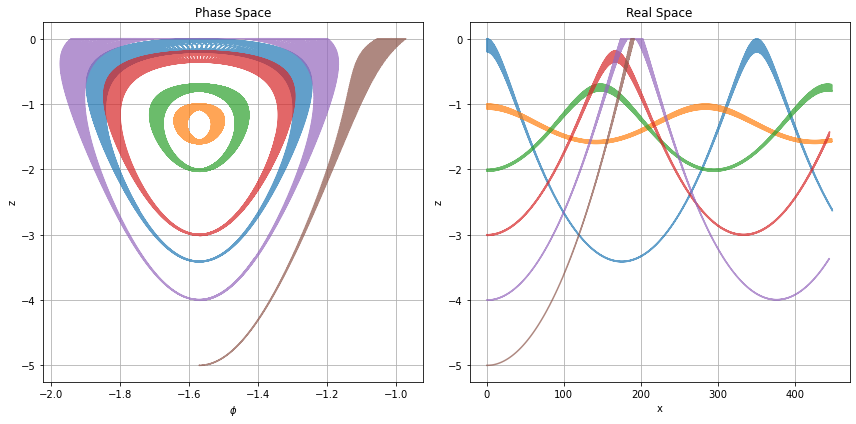

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
        
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('_MS_deterministic.png', dpi=300)
plt.show()


dt = 0.001 and tn = 5000, therefore a small timestep. It took 428 seconds, perfect convergence but too little time to see the evolution.

dt = 0.005 and tn = 15000 doesn't converge well and takes like 730 seconds.

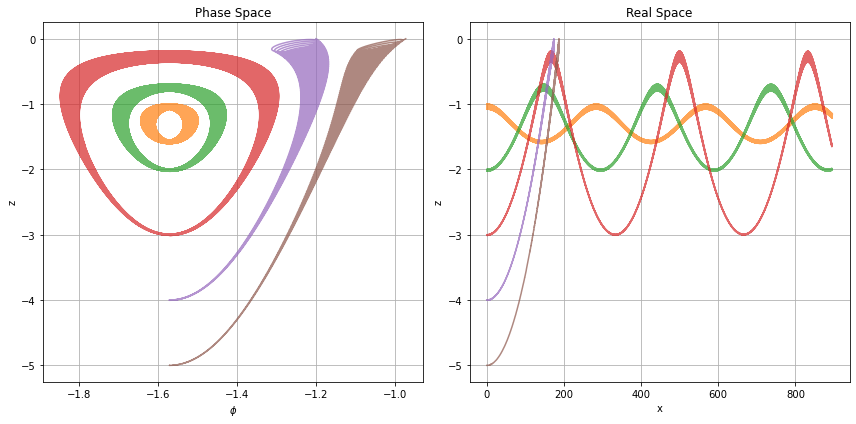


--- Abbassamento di z per ogni traiettoria ---
Traiettoria 0: z iniziale = 0.0000, z finale = 0.0000, Δz = 0.0000
Traiettoria 1: z iniziale = -1.0000, z finale = -1.1489, Δz = -0.1489
Traiettoria 2: z iniziale = -2.0000, z finale = -1.9933, Δz = 0.0067
Traiettoria 3: z iniziale = -3.0000, z finale = -1.6303, Δz = 1.3697
Traiettoria 4: z iniziale = -4.0000, z finale = 0.0000, Δz = 4.0000
Traiettoria 5: z iniziale = -5.0000, z finale = 0.0000, Δz = 5.0000


In [18]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_deterministic.png', dpi=300)
plt.show()

print("\n--- Abbassamento di z per ogni traiettoria ---")
for i, (x, z, phi) in enumerate(paths):
    z0 = z[0]
    zend = z[-1]
    drop = zend - z0
    print(f"Traiettoria {i}: z iniziale = {z0:.4f}, z finale = {zend:.4f}, Δz = {drop:.4f}")

# FOUND IT

## That's perfect, dt = 0.001 and tn = 10000, it took 1210 seconds, so 20 minutes roughly. I will eventually execute it for all the other 4 stochastic cases.

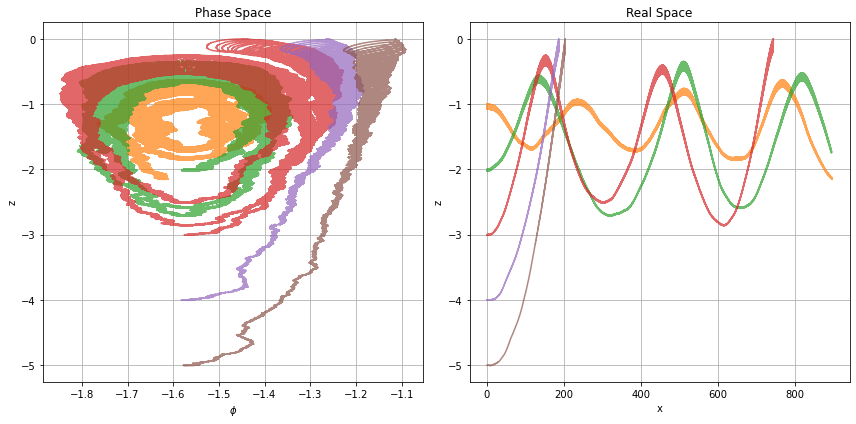

In [19]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.000001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic1.png', dpi=300)
plt.show()

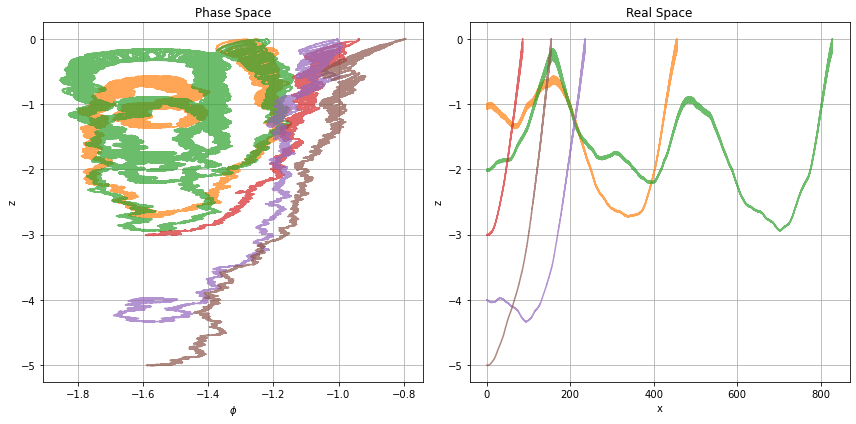

In [20]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic2.png', dpi=300)
plt.show()

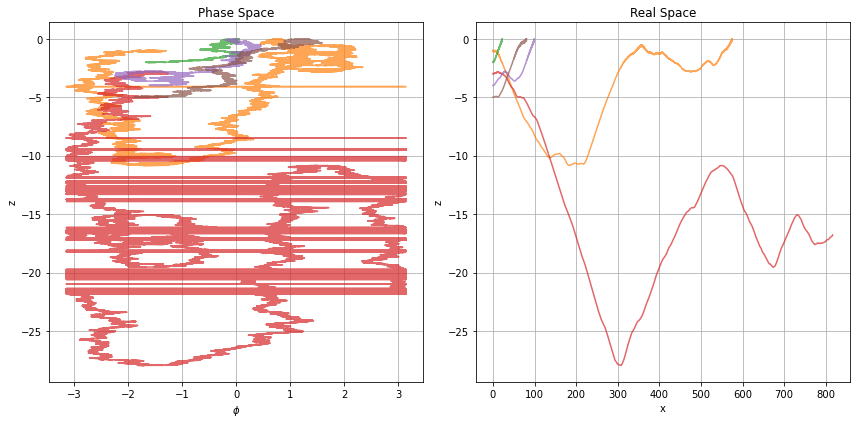

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic2_5.png', dpi=300)
plt.show()

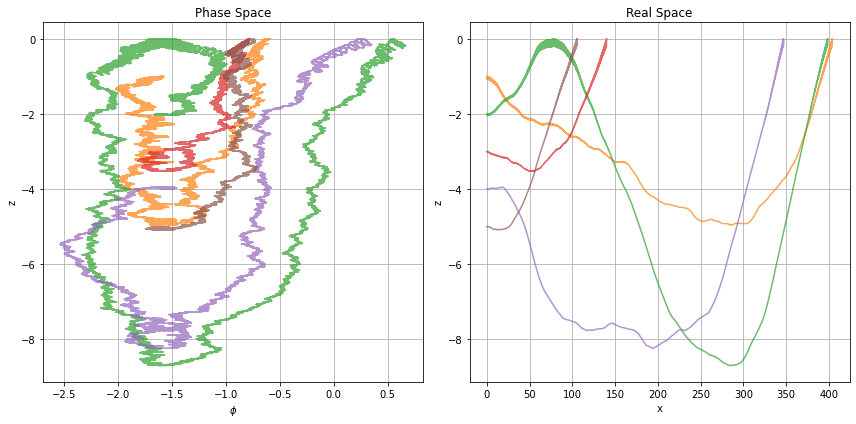

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.0001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic2_6.png', dpi=300)
plt.show()

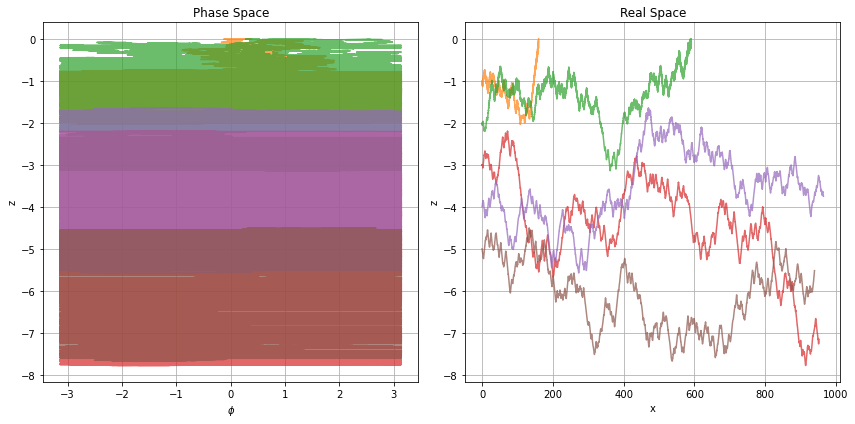

In [21]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.08

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic3.png', dpi=300)
plt.show()

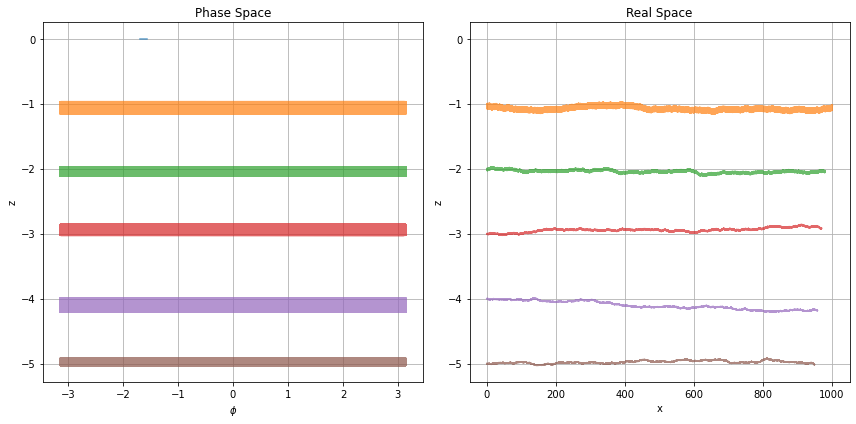

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 100

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic4.png', dpi=300)
plt.show()

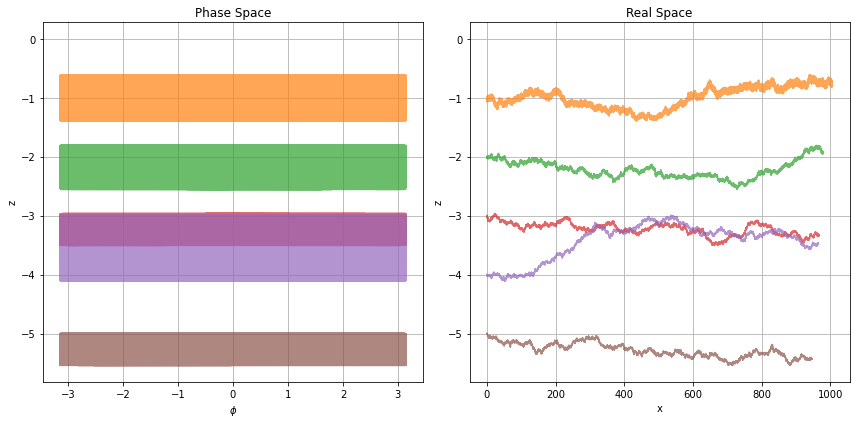

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 4.9348022005

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic3_5.png', dpi=300)
plt.show()

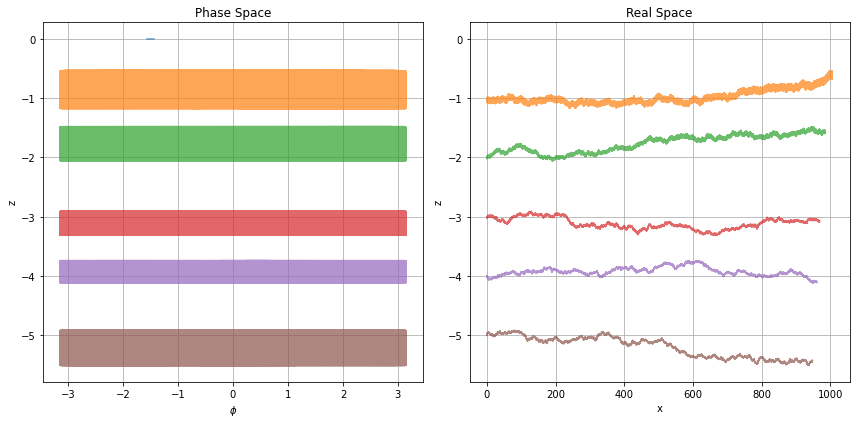

In [2]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 4.9348022005*2

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.001
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('Ffinal_MS_stochastic4.png', dpi=300)
plt.show()

# Translational diffusion, don't look now

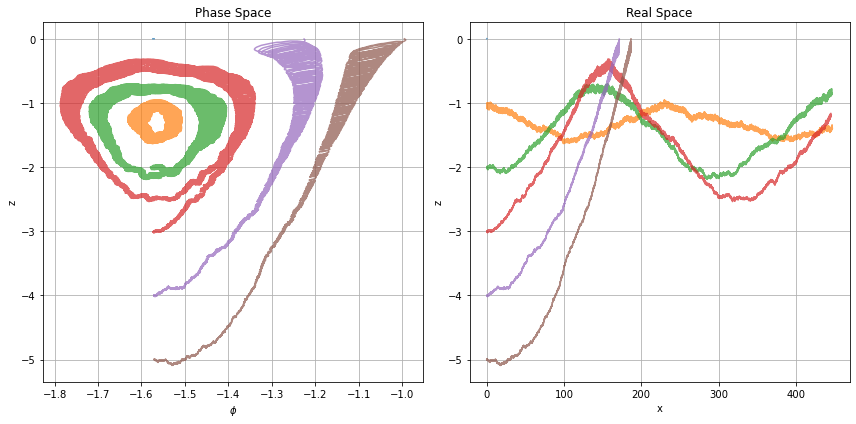

In [53]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.00001
D_r = 0.0000

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        if z[i+1] > 0:
            x[i+1:] = x[i+1]
            z[i+1:] = z[i+1]
            phi[i+1:] = phi[i+1]
            break
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


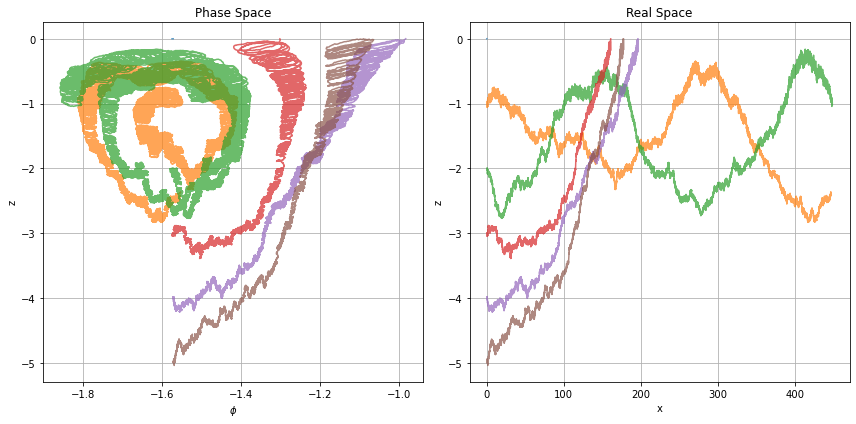

In [45]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0001
D_r = 0.00000

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        if z[i+1] > 0:
            x[i+1:] = x[i+1]
            z[i+1:] = z[i+1]
            phi[i+1:] = phi[i+1]
            break
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


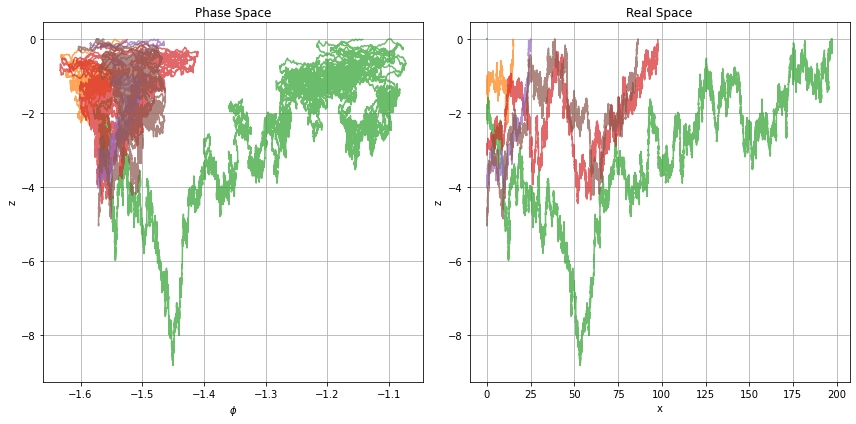

In [47]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 0.01
D_r = 0.00000

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        if z[i+1] > 0:
            x[i+1:] = x[i+1]
            z[i+1:] = z[i+1]
            phi[i+1:] = phi[i+1]
            break
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


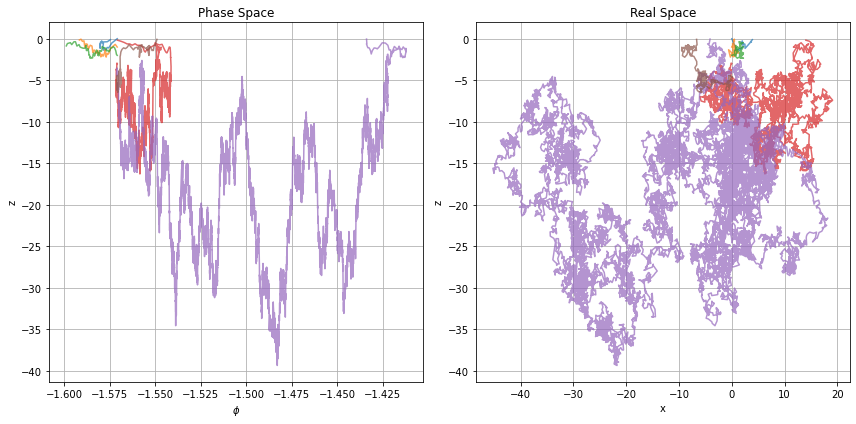

In [48]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 1
D_r = 0.00000

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        if z[i+1] > 0:
            x[i+1:] = x[i+1]
            z[i+1:] = z[i+1]
            phi[i+1:] = phi[i+1]
            break
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


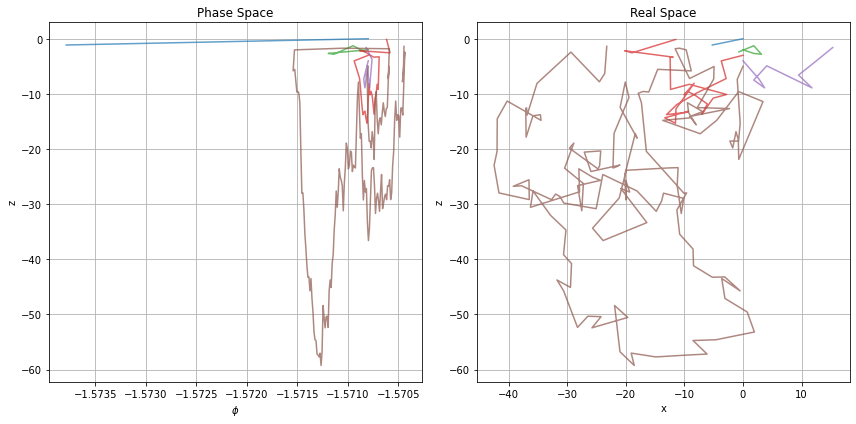

In [55]:
#Pure Shear, neutrally buoyant, non-gyrotactic, STOCHASTIC

import numpy as np
import matplotlib.pyplot as plt

D_t = 100
D_r = 0

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 5000
steps = 100000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        if z[i+1] > 0:
            x[i+1:] = x[i+1]
            z[i+1:] = z[i+1]
            phi[i+1:] = phi[i+1]
            break
    return x, z, phi

paths = np.zeros((num_paths, 3, len(t)))
for i in range(num_paths):
    #phi0 = np.random.uniform(0, 2*np.pi)
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = z
    paths[i, 2, :] = phi
   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

for path in paths:
    mask = path[1, :] <= 0
    phip = np.mod(path[2, mask], 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, path[1, mask], alpha=0.7)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for path in paths:
    mask = path[1, :] <= 0
    ax2.plot(path[0, mask], path[1, mask], alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('MS_stochastic_1.png', dpi=300)
plt.show()


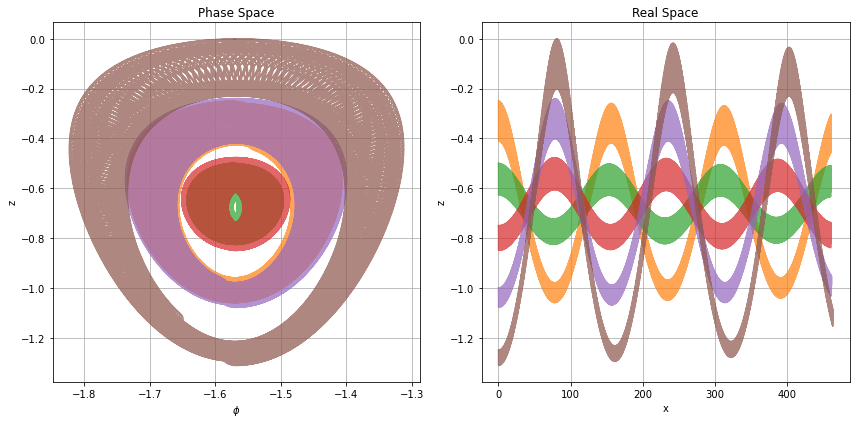

In [5]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.0

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = 1000

t0 = 0.0
tn = 5000
dt = 0.01
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -0.25*i, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('Ffinal_MS_stochastic4.png', dpi=300)
plt.show()